In [2]:
import cv2
img = cv2.imread('F:/CST17020/python/ImageProcessingProject/myProject/id/1.jpg')
img = cv2.resize(img,(1029,644))
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

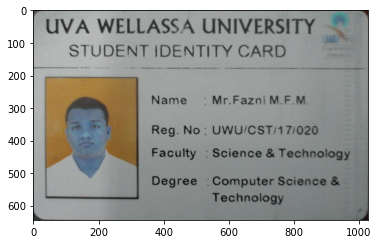

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img)

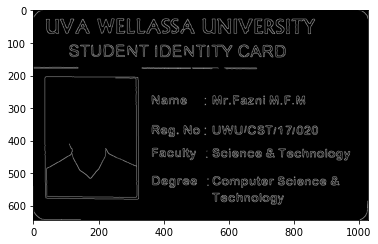

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

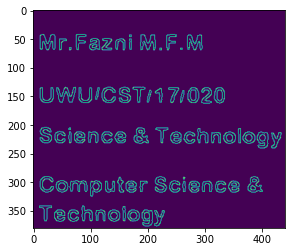

In [5]:
cropped2 = edged[220:600,540:980]
plt.imshow(cropped2)

In [6]:
import imutils
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[ 37, 205]],

       [[ 39, 576]],

       [[323, 579]],

       [[322, 207]]], dtype=int32)

In [9]:
import numpy as np
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

In [10]:
for x,y in enumerate(location):
    print(x)
    print(y)

0
[[ 37 205]]
1
[[ 39 576]]
2
[[323 579]]
3
[[322 207]]


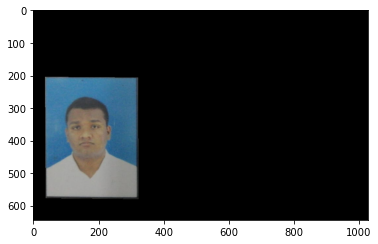

In [11]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

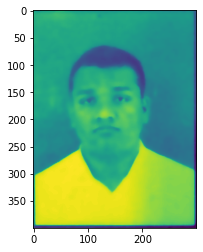

In [14]:
width,height= 300,400
pts1 = np.float32([location[0],location[3],location[1],location[2]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix1=cv2.getPerspectiveTransform(pts1, pts2)
imgId=cv2.warpPerspective(bfilter,matrix1,(width,height))
plt.imshow(imgId)
# cv2.imwrite('savedImage.jpg',imgId)

# cv2.imshow("imgId",imgId)

In [86]:
import pytesseract

# import easyocr

pytesseract.pytesseract.tesseract_cmd = 'F:\\Program Files\\Tesseract-OCR\\tesseract.exe'

ret, thresh1 = cv2.threshold(edged, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
  

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
  
# Appplying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
  
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)
  
# Creating a copy of image
im2 = img.copy()
  
# A text file is created and flushed
# file = open("recognized.txt", "w+")
# file.write("")
# file.close()
  
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    
    x,y,w,h =540,220,950,580
    
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(bfilter, (x, y), (x + w, y + h), (0, 255, 0), 2)
      
    # Cropping the text block for giving input to OCR
    cropped = bfilter[y:y + h, x:x + w]
      
    # Open the file in append mode
    # file = open("recognized.txt", "a")
      
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped, config='--oem 2 --psm 3')
#     reader = easyocr.Reader(['en'])
#     output = reader.readtext(cropped)
# print(output)
  
# cv2.imshow('image',im2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print(text) 
    # Appending the text into file
#     file.write(text)
#     file.write("\n")
      
    # Close the file
#     file.close

 

 

Mr.Fazni M.F.M
UWU/CST/17/020
Science & Technology

Computer Science &
Technology



In [111]:
# from pytesseract import Output

# # img = cv2.imread('invoice-sample.jpg')

# d = pytesseract.image_to_data(img, output_type=Output.DICT)
# print(d.keys())
# n_boxes = len(d['text'])
# for i in range(n_boxes):
#     if int(d['conf'][i]) > 60:
#         (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#         img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# cv2.imshow('img', img)
# cv2.waitKey(0)

In [29]:
# import joblib

# joblib.dump